<a href="https://colab.research.google.com/github/sandip924/Data_science_projects/blob/main/Netflix_movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ratings=pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
movie = pd.read_csv('movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.shape

(920159, 4)

In [8]:
movie.shape

(27278, 3)

In [9]:
dataset=pd.merge(ratings,movie,on='movieId')
dataset.tail()

,userId,movieId,rating,timestamp,title,genres
920154,6111,45837,3.5,1305343290,Let It Be (1970),Documentary
920155,6111,78737,3.0,1281403111,Captain from Castile (1947),Adventure|Drama
920156,6112,6623,2.5,1095899483,Passionada (2002),Comedy|Romance
920157,6112,47148,4.5,1257221301,Mrs. Palfrey at the Claremont (2005),Comedy|Drama
920158,6125,27867,5.0,1351945100,"Football Factory, The (2004)",Action|Drama


In [10]:
dataset.describe()

,userId,movieId,rating,timestamp
count,920159.000000,920159.000000,920159.000000,9.201590e+05
mean,3093.529921,8711.900556,3.526055,1.096935e+09
std,1759.739737,19184.556522,1.050962,1.599436e+08
min,1.000000,1.000000,0.500000,9.396850e+05
25%,1588.000000,903.000000,3.000000,9.657406e+08
50%,3149.000000,2145.000000,4.000000,1.099354e+09
75%,4577.000000,4649.000000,4.000000,1.219806e+09
max,6145.000000,130642.000000,5.000000,1.427764e+09


In [11]:
movie.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [13]:
import datetime
from datetime import datetime,date
dataset['datetime']=pd.to_datetime(dataset['timestamp'])

In [14]:
dataset.shape

(920159, 7)

In [15]:
dataset.nunique()

userId         6145
movieId       13804
rating           10
timestamp    722595
title         13799
genres         1053
datetime     722595
dtype: int64

In [16]:
dataset.describe()

,userId,movieId,rating,timestamp
count,920159.000000,920159.000000,920159.000000,9.201590e+05
mean,3093.529921,8711.900556,3.526055,1.096935e+09
std,1759.739737,19184.556522,1.050962,1.599436e+08
min,1.000000,1.000000,0.500000,9.396850e+05
25%,1588.000000,903.000000,3.000000,9.657406e+08
50%,3149.000000,2145.000000,4.000000,1.099354e+09
75%,4577.000000,4649.000000,4.000000,1.219806e+09
max,6145.000000,130642.000000,5.000000,1.427764e+09


In [17]:
# Average Ratings
a=dataset
a=a.groupby('title')['rating'].mean()
a

title
"Great Performances" Cats (1998)             2.875000
$5 a Day (2008)                              3.300000
'71 (2014)                                   3.000000
'Hellboy': The Seeds of Creation (2004)      3.125000
'Neath the Arizona Skies (1934)              3.500000
                                               ...   
xXx (2002)                                   2.970297
xXx: State of the Union (2005)               2.482143
¡Three Amigos! (1986)                        3.145105
À nos amours (1983)                          2.000000
À nous la liberté (Freedom for Us) (1931)    3.600000
Name: rating, Length: 13799, dtype: float64

In [19]:
sorted_ratingwise_movie=a.sort_values(ascending=False)
sorted_ratingwise_movie

title
Miracle of Bern, The (Wunder von Bern, Das) (2003)                        5.0
Full Moon in Paris (Les nuits de la pleine lune) (1984)                   5.0
Swann in Love (Un amour de Swann) (1984)                                  5.0
My Girlfriend's Boyfriend (2010)                                          5.0
Movie Movie (1978)                                                        5.0
                                                                         ... 
Nine Dead Gay Guys (2003)                                                 0.5
Cinderfella (1960)                                                        0.5
Jack and the Cuckoo-Clock Heart (Jack et la mécanique du coeur) (2013)    0.5
Station, The (Blutgletscher) (2013)                                       0.5
Spring Break Shark Attack (2005)                                          0.5
Name: rating, Length: 13799, dtype: float64

In [20]:
b=dataset.groupby('title')['rating'].count()
b.tail()

title
xXx (2002)                                   202
xXx: State of the Union (2005)                28
¡Three Amigos! (1986)                        286
À nos amours (1983)                            1
À nous la liberté (Freedom for Us) (1931)      5
Name: rating, dtype: int64

In [21]:
# make new dataframe
new_record=pd.DataFrame()
new_record['average_ratings']=a

In [22]:
new_record['count_of_ratings']=b

In [23]:
new_record.head()

,average_ratings,count_of_ratings
title,,
"""Great Performances"" Cats (1998)",2.875,8
$5 a Day (2008),3.300,5
'71 (2014),3.000,1
'Hellboy': The Seeds of Creation (2004),3.125,4
'Neath the Arizona Skies (1934),3.500,2


In [24]:
# Data visualization
import seaborn as sns
sns.set_style('white')

In [25]:
new_record.columns

Index(['average_ratings', 'count_of_ratings'], dtype='object')

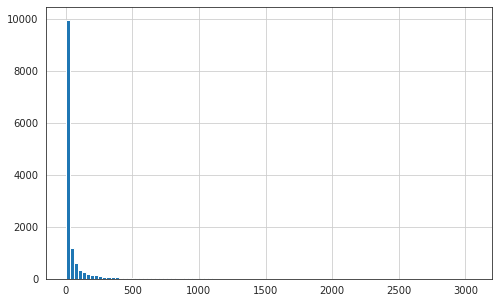

In [26]:
plt.figure(figsize=(8,5))
new_record['count_of_ratings'].hist(bins=100)

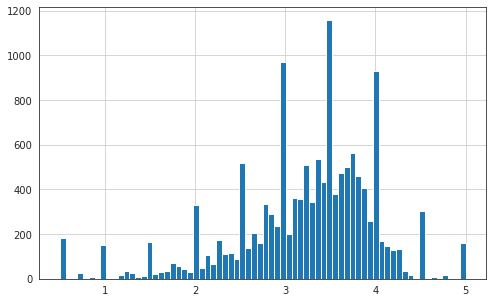

In [27]:
plt.figure(figsize=(8,5))
new_record['average_ratings'].hist(bins=70)

<Figure size 576x432 with 0 Axes>

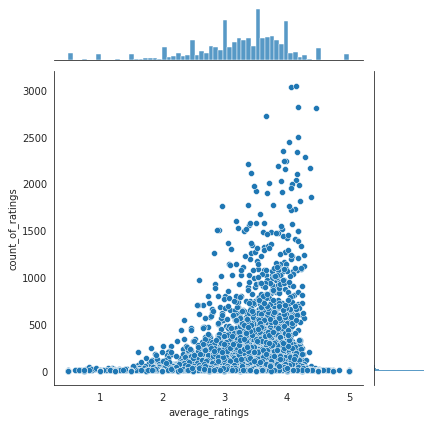

In [30]:
plt.figure(figsize=(8,6))
sns.jointplot(x='average_ratings',y='count_of_ratings',data=new_record,cmap='rainbow')

In [33]:
movie_matrix=dataset.pivot_table(index='userId',columns='title',values='rating')
movie_matrix.head()
movie_matrix.columns

Index(['"Great Performances" Cats (1998)', '$5 a Day (2008)', ''71 (2014)',
       ''Hellboy': The Seeds of Creation (2004)',
       ''Neath the Arizona Skies (1934)', ''R Xmas (2001)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''burbs, The (1989)',
       ...
       'Zus & Zo (2001)', '[REC] (2007)', '[REC]² (2009)', 'eXistenZ (1999)',
       'loudQUIETloud: A Film About the Pixies (2006)', 'xXx (2002)',
       'xXx: State of the Union (2005)', '¡Three Amigos! (1986)',
       'À nos amours (1983)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=13799)

In [35]:
movie_matrix['xXx (2002)']

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
        ..
6141   NaN
6142   NaN
6143   NaN
6144   NaN
6145   NaN
Name: xXx (2002), Length: 6145, dtype: float64

In [38]:
xXx_2002_ratings=movie_matrix['xXx (2002)']

In [39]:
# Try to find similarities with movie
xXx_2002_ratings.tail()

userId
6141   NaN
6142   NaN
6143   NaN
6144   NaN
6145   NaN
Name: xXx (2002), dtype: float64

In [40]:
movies_similar_to_xXx2002=movie_matrix.corrwith(xXx_2002_ratings)
movies_similar_to_xXx2002

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
"Great Performances" Cats (1998)                  NaN
$5 a Day (2008)                                   NaN
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Neath the Arizona Skies (1934)                   NaN
                                               ...   
xXx (2002)                                   1.000000
xXx: State of the Union (2005)               0.418372
¡Three Amigos! (1986)                       -0.017579
À nos amours (1983)                               NaN
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 13799, dtype: float64

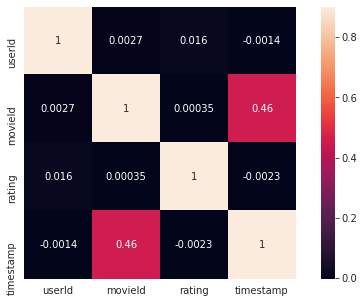

In [41]:
correlation_matrix=dataset.corr()
plt.figure(figsize=(9,5))
sns.heatmap(correlation_matrix,annot=True,vmax=0.9,square=True)
plt.show()

In [43]:
xXx_2002_corr=pd.DataFrame(movies_similar_to_xXx2002,columns=['correlation'])
xXx_2002_corr.dropna(inplace=True)
xXx_2002_corr

,correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",0.053614
(500) Days of Summer (2009),-0.024925
*batteries not included (1987),-0.152583
...And Justice for All (1979),0.356348
...,...
[REC] (2007),0.125000
eXistenZ (1999),0.096865
xXx (2002),1.000000


In [44]:
xXx_2002_corr=pd.DataFrame(movies_similar_to_xXx2002,columns=['correlation'])
xXx_2002_corr.dropna(inplace=True)
xXx_2002_corr.head()

,correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",0.053614
(500) Days of Summer (2009),-0.024925
*batteries not included (1987),-0.152583
...And Justice for All (1979),0.356348
